In [54]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from kmodes.kmodes import KModes

import scipy
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import norm

In [55]:
# I. LOAD THE DATASET 
# Raw data source from https://www.usaspending.gov/
# upload raw data from a .csv file as Pandas dataframe
data=pd.read_csv(r'C:\Users\15053\Documents\CSU - Grad\CAPSTONE\DATA\DoD award data.csv')

# dataset for the statistical analysis
awards2021=data

In [56]:
# II. DATA EXPLORATION

# print number of observations and shape of the dataframe
print('DoD Awards dataset for FY2021 contains', len(awards2021), 'observations')
print('The shape of the dataset is (rows x columns):', awards2021.shape)

pd.set_option("display.max.columns", None) # set to display all columns
awards2021.head() # show headers and first 5 rows of data
awards2021.tail() # display headers and last 5 rows of data

DoD Awards dataset for FY2021 contains 43421 observations
The shape of the dataset is (rows x columns): (43421, 25)


,award_id_piid,award_value,action_date,start_date,end_date,solicitation_date,sub_agency_code,sub_agency_name,recipient_duns,recipient_name,recipient_parent_name,recipient_country_code,award_type,type_of_contract_pricing_code,type_of_contract_pricing,product_or_service_code,product_or_service_code_description,naics_code,naics_description,domestic_or_foreign_entity_code,domestic_or_foreign_entity,extent_competed_code,extent_competed,type_of_set_aside_code,business_size
43416,FA873021C0040,34692.55,6/23/2021,6/24/2021 0:00,7/24/2021 0:00,5/23/2021,5700,DEPT OF THE AIR FORCE,610219896,"DBISP, LLC",DBISP LLC,USA,DEFINITIVE CONTRACT,J,FIRM FIXED PRICE,7B20,IT AND TELECOM - HIGH PERFORMANCE COMPUTE (HAR...,334118.0,COMPUTER TERMINAL AND OTHER COMPUTER PERIPHERA...,A,U.S. OWNED BUSINESS,D,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,SBA,SMALL BUSINESS
43417,N6339421C0002,20234000.00,9/1/2021,11/25/2020 0:00,4/27/2022 0:00,7/17/2020,1700,DEPT OF THE NAVY,159067490,"DCX-CHOL ENTERPRISES, INC.",DCX-CHOL ENTERPRISES INC.,USA,DEFINITIVE CONTRACT,J,FIRM FIXED PRICE,5999,MISCELLANEOUS ELECTRICAL AND ELECTRONIC COMPON...,334519.0,OTHER MEASURING AND CONTROLLING DEVICE MANUFAC...,A,U.S. OWNED BUSINESS,D,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,SBA,SMALL BUSINESS
43418,N6339421C0002,8774000.00,9/10/2021,11/25/2020 0:00,4/27/2022 0:00,7/17/2020,1700,DEPT OF THE NAVY,159067490,"DCX-CHOL ENTERPRISES, INC.",DCX-CHOL ENTERPRISES INC.,USA,DEFINITIVE CONTRACT,J,FIRM FIXED PRICE,5999,MISCELLANEOUS ELECTRICAL AND ELECTRONIC COMPON...,334519.0,OTHER MEASURING AND CONTROLLING DEVICE MANUFAC...,A,U.S. OWNED BUSINESS,D,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,SBA,SMALL BUSINESS
43419,N6339421C0002,17242000.00,11/24/2020,11/25/2020 0:00,3/30/2022 0:00,7/17/2020,1700,DEPT OF THE NAVY,159067490,"DCX-CHOL ENTERPRISES, INC.",DCX-CHOL ENTERPRISES INC.,USA,DEFINITIVE CONTRACT,J,FIRM FIXED PRICE,5999,MISCELLANEOUS ELECTRICAL AND ELECTRONIC COMPON...,334519.0,OTHER MEASURING AND CONTROLLING DEVICE MANUFAC...,A,U.S. OWNED BUSINESS,D,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,SBA,SMALL BUSINESS
43420,W15QKN21C5007,285000.00,2/22/2021,2/22/2021 0:00,3/22/2021 0:00,NaN,2100,DEPT OF THE ARMY,106243553,"ACADEMY BUS, L.L.C.",ACADEMY BUS L.L.C.,USA,DEFINITIVE CONTRACT,J,FIRM FIXED PRICE,V222,TRANSPORTATION/TRAVEL/RELOCATION- TRAVEL/LODGI...,485999.0,ALL OTHER TRANSIT AND GROUND PASSENGER TRANSPO...,A,U.S. OWNED BUSINESS,F,COMPETED UNDER SAP,NONE,SMALL BUSINESS


In [57]:
# print information about the dataset
awards2021.info() #prints number of non-null values per variable and their data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43421 entries, 0 to 43420
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   award_id_piid                        43421 non-null  object 
 1   award_value                          43421 non-null  float64
 2   action_date                          43421 non-null  object 
 3   start_date                           43421 non-null  object 
 4   end_date                             43421 non-null  object 
 5   solicitation_date                    28701 non-null  object 
 6   sub_agency_code                      43421 non-null  object 
 7   sub_agency_name                      43421 non-null  object 
 8   recipient_duns                       43421 non-null  int64  
 9   recipient_name                       43421 non-null  object 
 10  recipient_parent_name                43384 non-null  object 
 11  recipient_country_code      

In [58]:
# print the number of null (NaN) observations per variable
awards2021.isnull().sum()

award_id_piid                              0
award_value                                0
action_date                                0
start_date                                 0
end_date                                   0
solicitation_date                      14720
sub_agency_code                            0
sub_agency_name                            0
recipient_duns                             0
recipient_name                             0
recipient_parent_name                     37
recipient_country_code                     0
award_type                                 0
type_of_contract_pricing_code              3
type_of_contract_pricing                   3
product_or_service_code                    3
product_or_service_code_description        3
naics_code                                 4
naics_description                          4
domestic_or_foreign_entity_code          132
domestic_or_foreign_entity               132
extent_competed_code                       3
extent_com

In [59]:
# III. DESCRIPTIVE STATISTICS

# describing numeric variables (response variable:award_value)
# recepient_duns and naics_code are  

print('Median value of award_value in FY2021 is:',awards2021.award_value.median())
print('Mode value of award_value in FY2021 is:',awards2021.award_value.mode())
print('Kurtosis of median_value:', awards2021.award_value.kurt())
print('Skewness of award_value:', awards2021.award_value.skew())
awards2021.describe().apply(lambda s: s.apply('{0:.2f}'.format))

Median value of award_value in FY2021 is: 1974500.0
Mode value of award_value in FY2021 is: 0    457544235.0
dtype: float64
Kurtosis of median_value: 3093.435415377749
Skewness of award_value: 54.09634104852153


,award_value,recipient_duns,naics_code
count,43421.00,43421.00,43417.00
mean,34988803.62,324285655.80,454772.86
std,790190299.57,350784187.46,148510.02
min,100.00,1004258.00,111110.00
25%,719308.59,78840730.00,332618.00
50%,1974500.00,117101602.00,541519.00
75%,7861603.22,786169511.00,541715.00
max,50000676546.00,969998207.00,927110.00


In [60]:
## describing categorical variables
awards2021.describe(include=["object", "bool"])

,award_id_piid,action_date,start_date,end_date,solicitation_date,sub_agency_code,sub_agency_name,recipient_name,recipient_parent_name,recipient_country_code,award_type,type_of_contract_pricing_code,type_of_contract_pricing,product_or_service_code,product_or_service_code_description,naics_description,domestic_or_foreign_entity_code,domestic_or_foreign_entity,extent_competed_code,extent_competed,type_of_set_aside_code,business_size
count,43421,43421,43421,43421,28701,43421,43421,43421,43384,43421,43421,43418,43418,43418,43418,43417,43289,43289,43418,43418,43417,43418
unique,20836,359,3060,3128,1418,23,23,9154,8962,22,2,14,13,1263,1280,499,5,5,6,6,13,1
top,FA300221C0003,9/29/2021,9/30/2020 0:00,9/30/2021 0:00,3/20/2020,2100,DEPT OF THE ARMY,"ASRC FEDERAL FIELD SERVICES, LLC",ARCTIC SLOPE REGIONAL CORPORATION,USA,DEFINITIVE CONTRACT,J,FIRM FIXED PRICE,AD92,R&D- DEFENSE OTHER: OTHER (APPLIED RESEARCH/EX...,"RESEARCH AND DEVELOPMENT IN THE PHYSICAL, ENGI...",A,U.S. OWNED BUSINESS,D,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,SBA,SMALL BUSINESS
freq,252,561,695,1831,306,17227,17227,281,248,43358,40542,31405,33722,1720,1720,8835,42955,42955,18725,18725,18481,43418


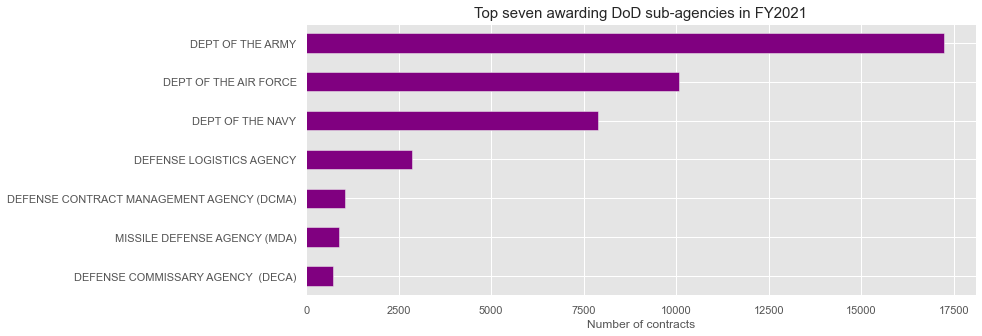

In [61]:
# plotting distribution of categorical variables
# value count per variable

awards2021.sub_agency_name.value_counts().sort_values().tail(7).plot(kind='barh', color='purple')
sns.set(rc = {'figure.figsize':(8,6)})
plt.title('Top seven awarding DoD sub-agencies in FY2021', fontsize=15)
plt.xlabel('Number of contracts', fontsize=12)
plt.show()

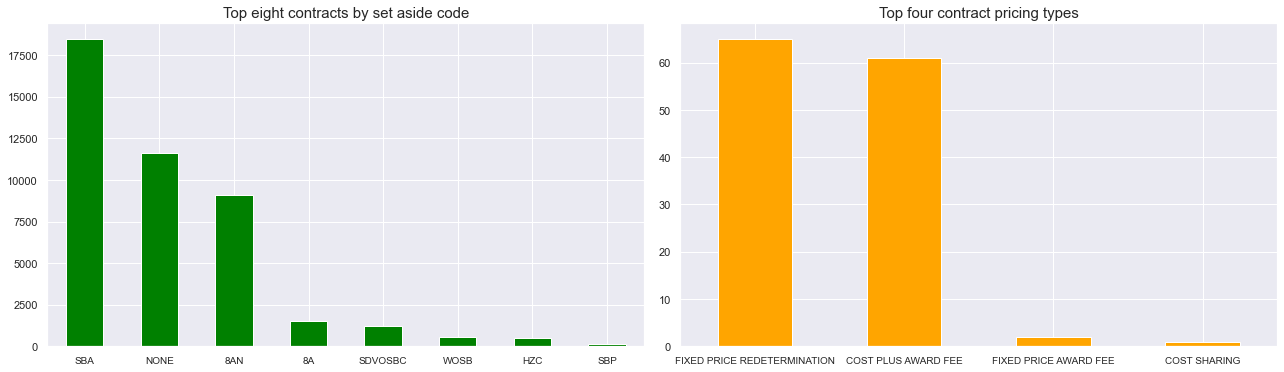

In [62]:
fig = plt.figure(figsize=(18,10))
ax=fig.add_subplot(221)

awards2021.type_of_set_aside_code.value_counts().sort_values(ascending=False).head(8).plot(kind='bar', color='green')
#ax1.set_xlabel(None)
plt.title('Top eight contracts by set aside code', fontsize=15)
plt.tick_params(axis='x', rotation=360)
plt.xticks(fontsize=10)

ax=fig.add_subplot(222)
awards2021.type_of_contract_pricing.value_counts().sort_values(ascending=False).tail(4).plot(kind='bar', color='orange')
plt.title('Top four contract pricing types', fontsize=15)
plt.xlabel(None)
plt.tick_params(axis='x', rotation=360)
plt.xticks(fontsize=10)

plt.tight_layout()
plt.show()

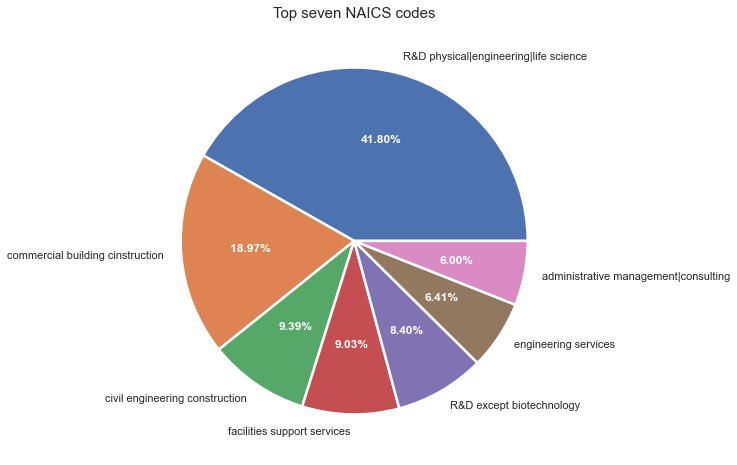

In [63]:
# pie chart with top 7 NAICS codes (industry)
top_naics=awards2021.naics_description.str.lower().value_counts().sort_values(ascending=False).head(7)
fig, ax = plt.subplots(figsize=(10, 10))
labels=['R&D physical|engineering|life science', 'commercial building cinstruction','civil engineering construction', \
        'facilities support services', 'R&D except biotechnology', 'engineering services','administrative management|consulting']

patches, texts, pcts = ax.pie(top_naics, labels=labels, autopct='%1.2f%%',\
                        wedgeprops={'linewidth': 2.5, 'edgecolor': 'white'})
plt.title('Top seven NAICS codes', fontsize=15)
plt.setp(pcts, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

In [64]:
# IV. CLEAN AND TRASFORM DATA

# 1.Recast award_value as string, and naics_code and recipent_duns as strings.
awards2021['start_date'] = pd.to_datetime(awards2021['start_date'], dayfirst=False, yearfirst=False)
awards2021['end_date'] = pd.to_datetime(awards2021['end_date'], dayfirst=False, yearfirst=False)
awards2021['solicitation_date'] = pd.to_datetime(awards2021['solicitation_date'], dayfirst=False, yearfirst=False)

# 2. Fill empty cells with NA.
awards2021=awards2021.fillna('NA')
awards2021.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,award_value,recipient_duns
count,43421.00,43421.00
mean,34988803.62,324285655.80
std,790190299.57,350784187.46
min,100.00,1004258.00
25%,719308.59,78840730.00
50%,1974500.00,117101602.00
75%,7861603.22,786169511.00
max,50000676546.00,969998207.00


In [65]:
# 3. Create new variables.
# Categorical variable to determine the elevel of competitieveness of the contract: 
    # '0' represents contracts that were not awarded as a result of competitive selection
    # '1' represents contracts awarded through competition

awards2021['competitiveness']=awards2021['extent_competed']
awards2021.loc[awards2021["competitiveness"] == 'FULL AND OPEN COMPETITION AFTER EXCLUSION OF SOURCES', 'competitiveness'] = 1
awards2021.loc[awards2021["competitiveness"] == 'FULL AND OPEN COMPETITION', 'competitiveness'] = 1
awards2021.loc[awards2021["competitiveness"] == 'COMPETED UNDER SAP', 'competitiveness'] = 1
awards2021.loc[awards2021["competitiveness"]=='NOT AVAILABLE FOR COMPETITION', 'competitiveness'] = 0
awards2021.loc[awards2021["competitiveness"]=='NOT COMPETED', 'competitiveness'] = 0
awards2021.loc[awards2021["competitiveness"]=='NOT COMPETED UNDER SAP', 'competitiveness'] = 0

# Categorical variable indicating whether a contract has a set aside requirement
    # '0' represents no set aside requirements assigned to a contract
    # '1' represents that a set aside requirement was assigned to a contract
 
awards2021['setaside_requirement']=awards2021['type_of_set_aside_code']
awards2021.loc[awards2021["setaside_requirement"] != "NONE", "setaside_requirement"] = 1
awards2021.loc[awards2021["setaside_requirement"] == "NONE", "setaside_requirement"] = 0
awards2021.reset_index() #convert to DataFrame
awards2021['setaside_requirement']=awards2021['setaside_requirement'].astype(int) #recast float as integer

# Categorical variable with action month (on the scale from 1 to 12)
awards2021['action_month'] = pd.to_datetime(awards2021['action_date']).dt.month

# Categorical variable to calculate number of months between the start and end date of the contract
awards2021['num_months'] = ((awards2021.end_date - awards2021.start_date)/np.timedelta64(1, 'M'))
awards2021['num_months'] = awards2021['num_months'].astype(int)

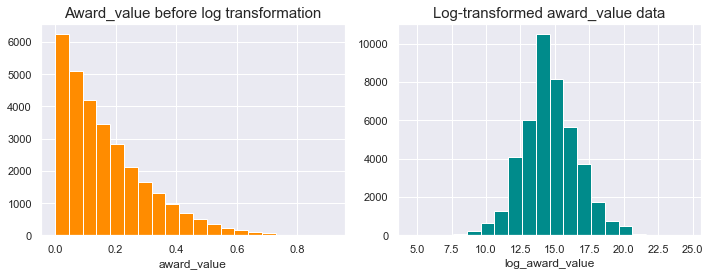

In [66]:
# 4. Log transform award_value variable. 
# Create a new column log_award_value withs log-transformed award values
awards2021['log_award_value']=np.log(awards2021['award_value'])

# plot the variable before and after transformation
# make this example reproducible using random seed
np.random.seed(0)

#create beta distributed random variable for plotting
# per https://www.statology.org/transform-data-in-python/
awards_hist=awards2021['award_value']
awards_hist = np.random.beta(a=1, b=5, size=30000)
log_awards_hist=awards2021['log_award_value']

# subplots
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
# plot non-transformed award_value variable
ax1.hist(awards_hist, color='darkorange', bins=20)
ax1.set_title('Award_value before log transformation', fontsize=15)
ax1.set_xlabel('award_value', fontsize=12)

# plot award_value data after log transformation
ax2.hist(log_awards_hist, color='darkcyan', bins=20)
ax2.set_title('Log-transformed award_value data', fontsize=15)
ax2.set_xlabel('log_award_value', fontsize=12)
plt.tight_layout()
plt.show()

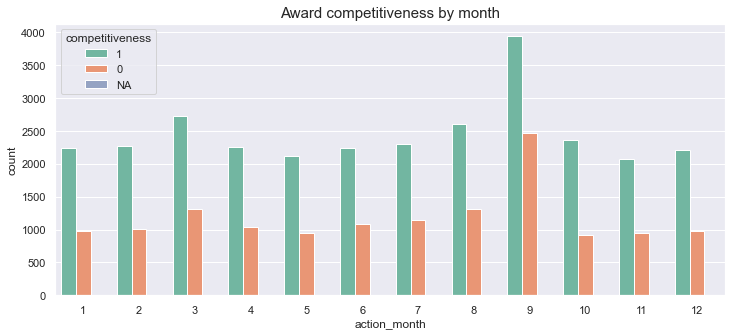

In [67]:
# Plotting contract competitiveness by month (new variable action_month).
sns.set(rc = {'figure.figsize':(12,5)})
sns.countplot(x="action_month", hue="competitiveness", data=awards2021, palette="Set2")
plt.title('Award competitiveness by month',  fontsize=15)
plt.show()

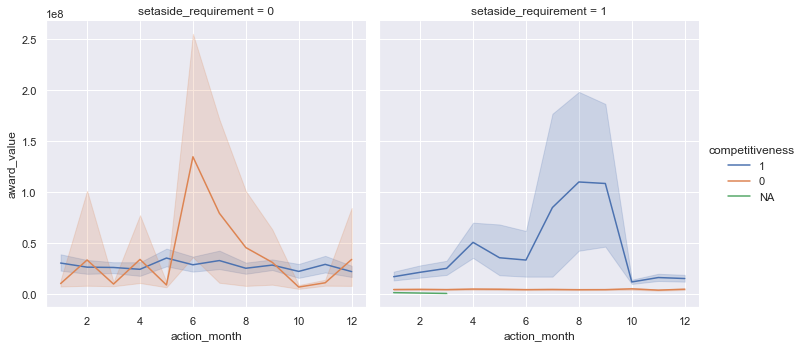

In [68]:
# Plotting award_values by acton_month and set_aside requirement based on competitiveness.
sns.relplot(data=awards2021, x="action_month", y="award_value",col="setaside_requirement", hue="competitiveness", kind="line")
plt.show()

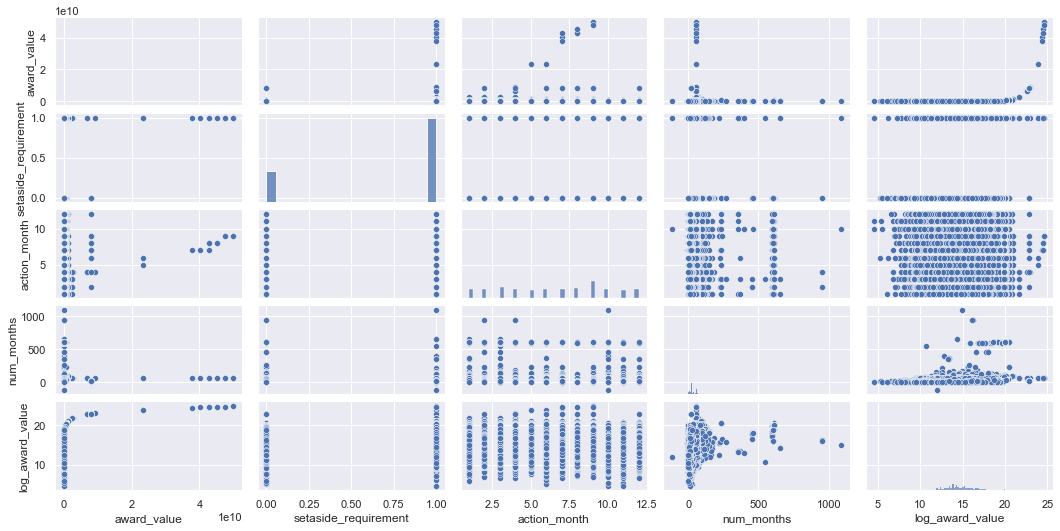

In [69]:
# Plotting pairwise relationships in the dataset.
sns.pairplot(awards2021.drop(columns='recipient_duns'), height=1.5, aspect=2)
plt.show()

In [70]:
# count the number of unique categories per variable
awards2021.nunique()

award_id_piid                          20836
award_value                            24538
action_date                              359
start_date                              3060
end_date                                3128
solicitation_date                       1419
sub_agency_code                           23
sub_agency_name                           23
recipient_duns                          9050
recipient_name                          9154
recipient_parent_name                   8963
recipient_country_code                    22
award_type                                 2
type_of_contract_pricing_code             15
type_of_contract_pricing                  14
product_or_service_code                 1264
product_or_service_code_description     1281
naics_code                               501
naics_description                        500
domestic_or_foreign_entity_code            6
domestic_or_foreign_entity                 6
extent_competed_code                       7
extent_com

In [71]:
# create a copy of the dataset for the hypothesis testing (step VI)
awards2021_ttest_data=awards2021.copy()

In [72]:
# V. PREDICTIVE MODELS

# The models used: linear regression, Lasso regression with iterative fitting; Lasso regression on the clustered dataset; decision tree regressor; and random forest regressor 

# LINEAR REGRESSION

# Create the dataset for linear regression analysis.
regression_data=awards2021

# dummify categorical predictors
X=regression_data.loc[:,['type_of_contract_pricing_code','setaside_requirement','competitiveness','sub_agency_name','num_months']]
Y=regression_data['log_award_value']
X=pd.get_dummies(data=X, drop_first=True).astype(int)

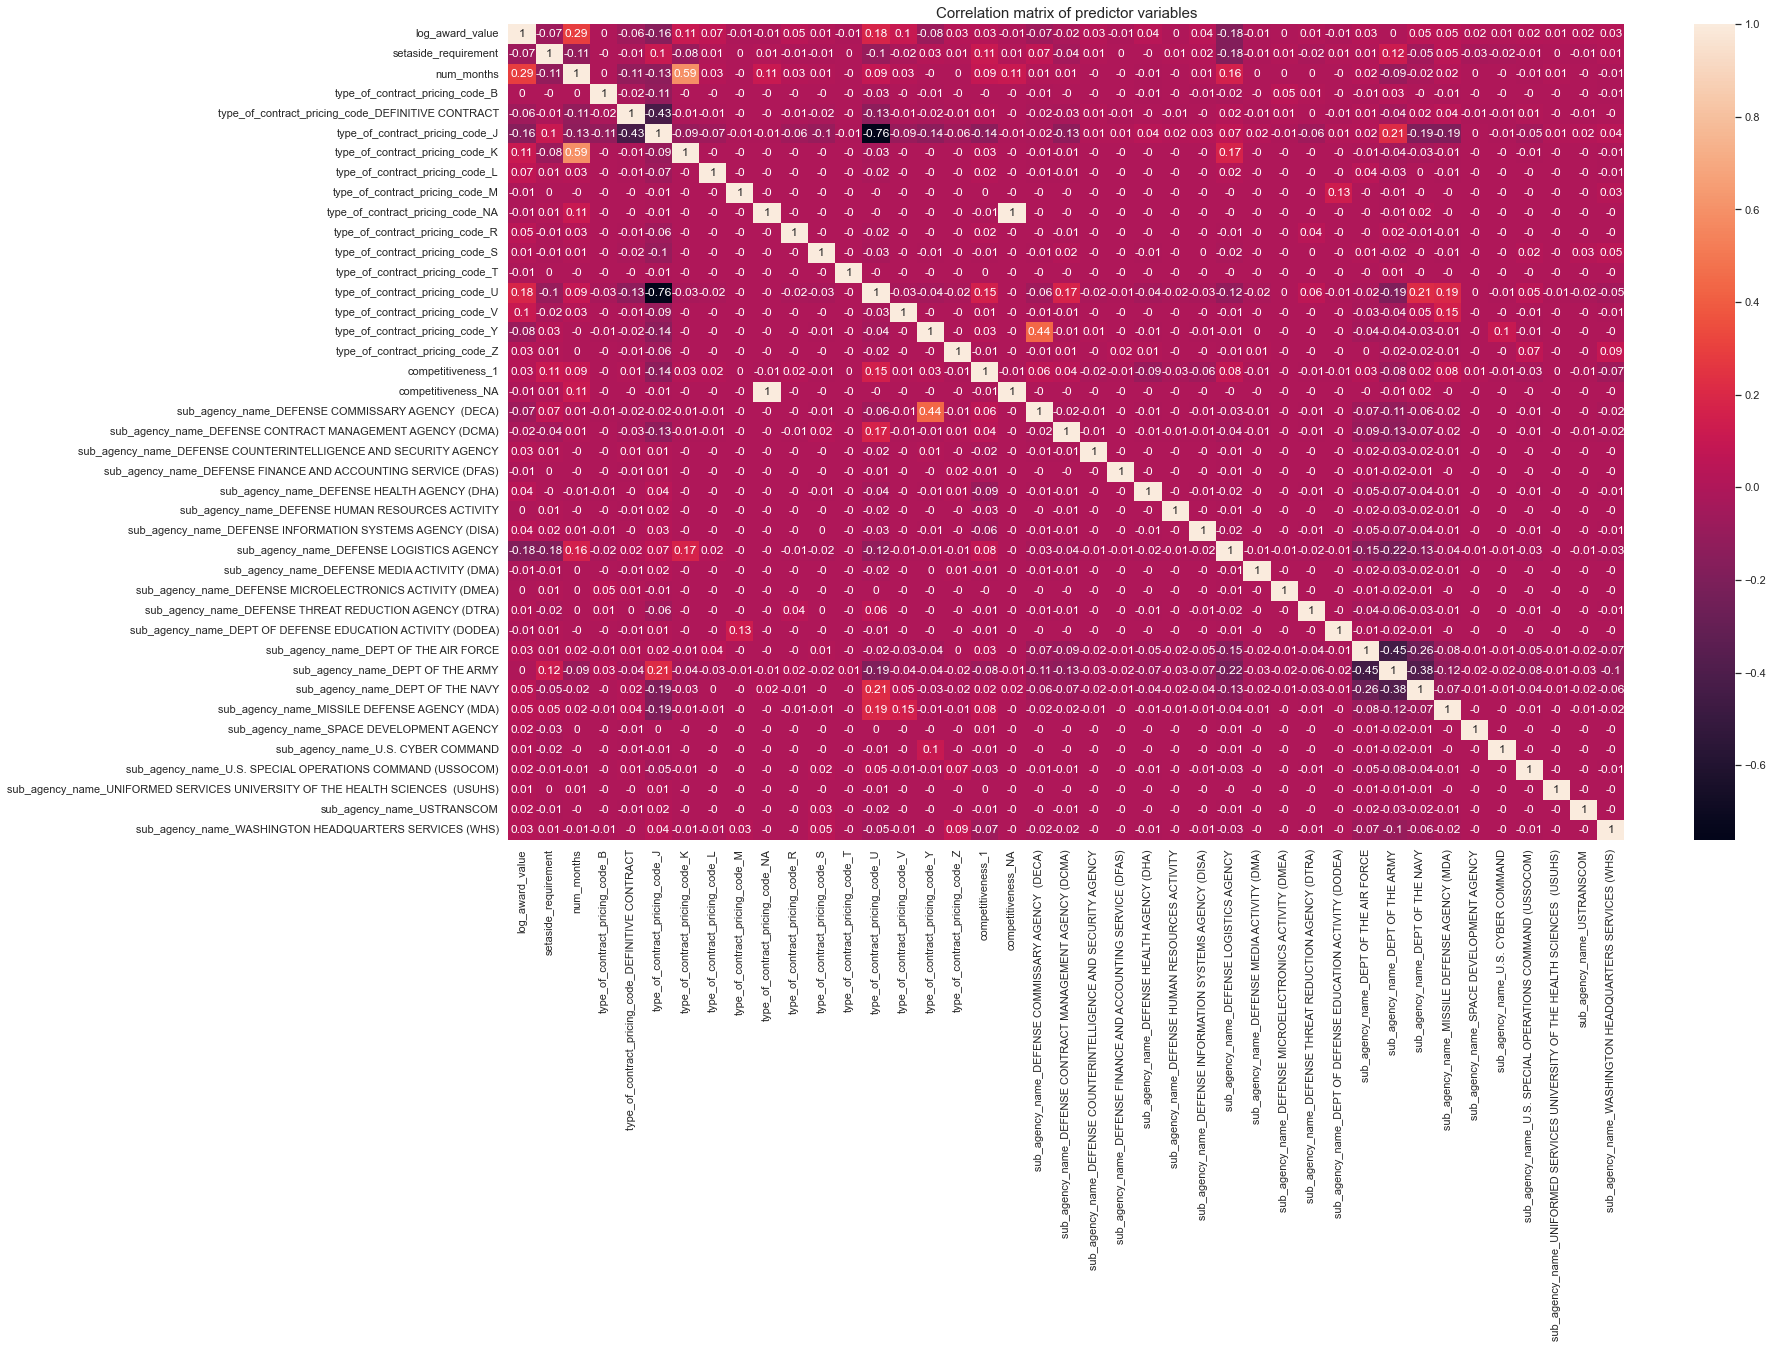

In [73]:
# calculate correlation matrix for dummy variables
variable_corr=pd.concat([Y,X], axis=1)
correlation_matrix = variable_corr.corr().round(2)

# plot correlation matrix
sns.set(rc = {'figure.figsize':(25,15)})
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Correlation matrix of predictor variables', fontsize=15)
plt.show()

In [74]:
# split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.20, random_state=0)

# fit linear regression
regression=linear_model.LinearRegression()
regression.fit(X_train, Y_train)

# print sorted coefficients
coeff_parameter = pd.DataFrame(regression.coef_,X.columns,columns=['Coefficient'])
print(coeff_parameter.sort_values(by='Coefficient').tail(20))

#predict on the test dataset
predicted=regression.predict(X_test)

                                                    Coefficient
type_of_contract_pricing_code_T                        0.273670
type_of_contract_pricing_code_K                        0.290687
sub_agency_name_U.S. SPECIAL OPERATIONS COMMAND...     0.326387
sub_agency_name_WASHINGTON HEADQUARTERS SERVICE...     0.454594
sub_agency_name_DEFENSE INFORMATION SYSTEMS AGE...     0.937971
sub_agency_name_DEFENSE HEALTH AGENCY (DHA)            0.939639
sub_agency_name_USTRANSCOM                             0.946454
sub_agency_name_U.S. CYBER COMMAND                     1.283396
sub_agency_name_SPACE DEVELOPMENT AGENCY               1.401813
sub_agency_name_DEFENSE COUNTERINTELLIGENCE AND...     1.845769
type_of_contract_pricing_code_Y                        2.051633
type_of_contract_pricing_code_B                        3.178008
type_of_contract_pricing_code_J                        3.234476
type_of_contract_pricing_code_DEFINITIVE CONTRACT      3.268267
type_of_contract_pricing_code_S         

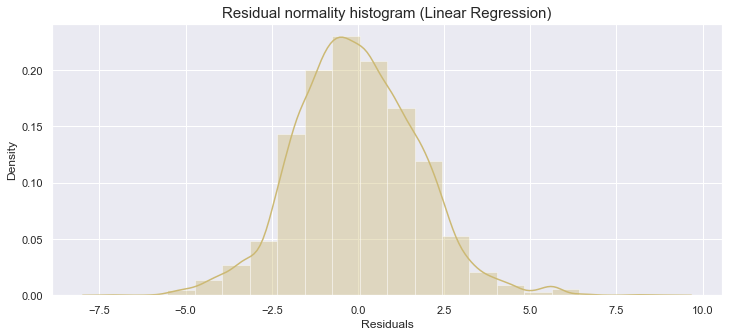

In [75]:
#plot the residuals
residuals = Y_test - predicted

# plot the residuals (log-transformed response variable)
sns.set(rc = {'figure.figsize':(12,5)})
sns.distplot(residuals, bins = 20, color='y') # you may select the no. of bins
plt.title('Residual normality histogram (Linear Regression)', fontsize=15)           
plt.xlabel('Residuals', fontsize = 12)     
plt.show()

In [76]:
# compare actual and predicted values (back-transfrormed)
df = pd.DataFrame({'Actual': np.exp(Y_test), 'Predicted': np.exp(predicted),'Difference':np.exp(Y_test)-np.exp(predicted)})
print(df.head(10).apply(lambda s: s.apply('{0:.2f}'.format)))

             Actual    Predicted    Difference
38041   16767500.00   1839970.28   14927529.72
5627   198015631.00   7119435.95  190896195.05
25041     326468.05   2527595.55   -2201127.50
36083    1710493.00   1636607.18      73885.82
2107     1597471.78  12238298.31  -10640826.53
40072    3941108.40   3893004.24      48104.16
3607     1499994.90   2249776.72    -749781.82
43355     221752.00   2728755.02   -2507003.02
6368     4643720.00   2571704.27    2072015.73
26834     575436.00   1839771.96   -1264335.96


In [77]:
# back-transform predicted and test data
predicted=pd.DataFrame(np.exp(predicted))

# back-transformed log_transformed Y_test
print(Y_test.mean()) # check that Y_test variable still contains log-transformed data before calculating the explonential
Y_test=pd.DataFrame(np.exp(Y_test)) 

# define the function to evauate predictive accuracy of a model
# r2 metrics from https://www.datacourses.com/evaluation-of-regression-models-in-scikit-learn-846/

print('Evaluation metrics for linear regression:')
mae = metrics.mean_absolute_error(Y_test, predicted)
mse = metrics.mean_squared_error(Y_test, predicted)
r2 = metrics.r2_score(Y_test, predicted)
variance=round(r2*100,2)
n = predicted.shape[0]
k = X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

print('Mean absolute error  is:',mae)
print('Mean squared error is:',mse)
print('R squared is:',r2)
print('Explained variance:', variance,'%')
print('Adjusted R squared is:',adj_r_sq)

14.612901928037278
Evaluation metrics for linear regression:
Mean absolute error  is: 24936875.53568158
Mean squared error is: 2.6645438577290726e+17
R squared is: -0.0059795550058108216
Explained variance: -0.6 %
Adjusted R squared is: -0.010634712594916884


In [78]:
# LASSO REGRESSION WITH ITERATIVE FITTING
# Lasso with 5 fold cross-validation

# get data for regression
regression_data=awards2021

X=regression_data.loc[:,['type_of_contract_pricing_code','setaside_requirement','competitiveness','num_months','sub_agency_name', 'naics_description','product_or_service_code_description']]
Y=regression_data['log_award_value']
X=pd.get_dummies(data=X, drop_first=True)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.20, random_state=0)

In [79]:
# code for optimal alpha parameter from https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/

model = LassoCV(cv=5, random_state=0, max_iter=10000)

# fit the model
model.fit(X_train, Y_train)

# testing the optimal aplha parameter
print('Optimal alpha parameter:', model.alpha_)
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, Y_train)

# predict on the test dataset
y_pred=lasso_best.predict(X_test)

#print most significant coefficients selected by the Lasso algorithm
lasso_coeff=list(zip(lasso_best.coef_, X_train))
# 
print(sorted(lasso_coeff[:30], reverse=True))

Optimal alpha parameter: 0.024743650798183154
[(0.7571952358215036, 'type_of_contract_pricing_code_U'), (0.06177163623325577, 'competitiveness_1'), (0.013153101486631397, 'num_months'), (0.0, 'type_of_contract_pricing_code_Z'), (-0.0, 'type_of_contract_pricing_code_Y'), (0.0, 'type_of_contract_pricing_code_V'), (-0.0, 'type_of_contract_pricing_code_T'), (0.0, 'type_of_contract_pricing_code_S'), (0.0, 'type_of_contract_pricing_code_R'), (-0.0, 'type_of_contract_pricing_code_NA'), (-0.0, 'type_of_contract_pricing_code_M'), (0.0, 'type_of_contract_pricing_code_L'), (-0.0, 'type_of_contract_pricing_code_K'), (-0.0, 'type_of_contract_pricing_code_DEFINITIVE CONTRACT'), (0.0, 'type_of_contract_pricing_code_B'), (-0.0, 'sub_agency_name_DEPT OF DEFENSE EDUCATION ACTIVITY (DODEA)'), (-0.0, 'sub_agency_name_DEFENSE THREAT REDUCTION AGENCY (DTRA)'), (-0.0, 'sub_agency_name_DEFENSE MICROELECTRONICS ACTIVITY (DMEA)'), (-0.0, 'sub_agency_name_DEFENSE MEDIA ACTIVITY (DMA)'), (0.0, 'sub_agency_name_DE

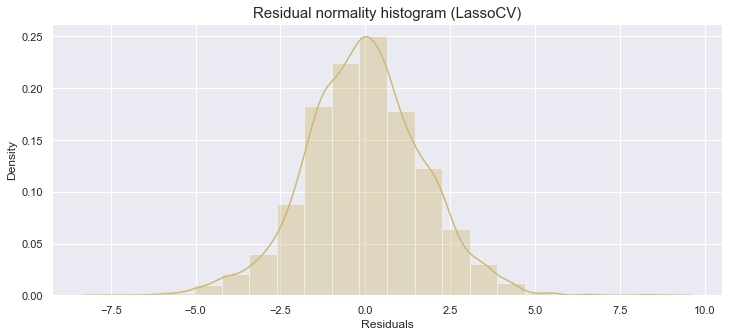

In [80]:
#plot the residuals
residuals = Y_test - y_pred 

# plot the residuals (log-transformed response variable)
sns.set(rc = {'figure.figsize':(12,5)})
sns.distplot(residuals, bins = 20, color='y') # you may select the no. of bins
plt.title('Residual normality histogram (LassoCV)', fontsize=15)           
plt.xlabel('Residuals', fontsize = 12)     
plt.show()

In [81]:
# inverse log_transformed predicted and test data
y_pred=pd.DataFrame(np.exp(y_pred))

# back-transformed test and predicted values
print(Y_test.mean()) # check that Y_test variable still contains log-transformed data before calculating the explonential
Y_test=pd.DataFrame(np.exp(Y_test)) 

# evauate predictive accuracy of a model

print('Evaluation metrics for Lasso regression:')
mae = metrics.mean_absolute_error(Y_test, y_pred)
mse = metrics.mean_squared_error(Y_test, y_pred)
r2 = metrics.r2_score(Y_test, y_pred)
variance=round(r2*100,2)
n = y_pred.shape[0]
k = X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

print('Mean absolute error  is:',mae)
print('Mean squared error is:',mse)
print('R squared is:',r2)
print('Explained variance:', variance,'%')
print('Adjusted R squared is:',adj_r_sq)

14.612901928037278
Evaluation metrics for Lasso regression:
Mean absolute error  is: 27882714.796095937
Mean squared error is: 2.7505794803078614e+17
R squared is: -0.03846169151311618
Explained variance: -3.85 %
Adjusted R squared is: -0.3136200042388786


In [82]:
# LASSO REGRESSION WITH ITERATIVE FITTING ON DATA CLUSTERED WITH THE KMODE ALGORITHM

knn_data=awards2021

#dummify categorical variables
knn_data=knn_data.loc[:,['type_of_contract_pricing_code','setaside_requirement','competitiveness','num_months','log_award_value']]
knn_data=pd.get_dummies(data=knn_data, drop_first=True)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 132915.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 132915.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 132915.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 132915.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 132915.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 502, cost: 118786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 164, cost: 121299.0
Init: initializing centroids
Init: initializing clusters
Startin

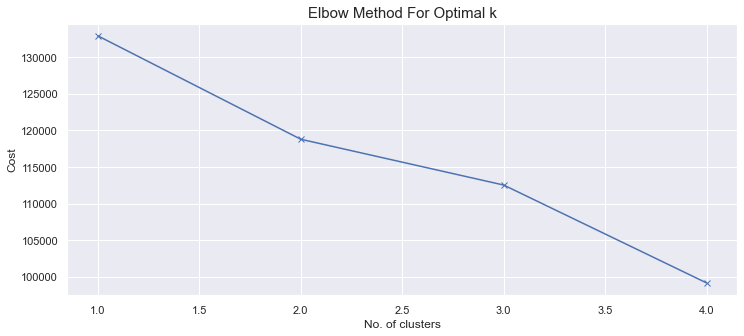

In [83]:
# Elbow curve to find optimal K parameter. Code from https://github.com/harika-bonthu/KModes/blob/main/kmodes.ipynb

cost = []
K = range(1,5)

for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(knn_data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k', fontsize=15)
plt.show()

In [84]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(knn_data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17317, cost: 117591.0
Run 1, iteration: 2/100, moves: 10949, cost: 117075.0
Run 1, iteration: 3/100, moves: 0, cost: 117075.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 24, cost: 129631.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 481, cost: 117971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1127, cost: 117131.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 31, cost: 114369.0
Best run was number 5


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [85]:
# create a new variable cluster to store cluster numbers
knn_data.insert(0, "cluster", clusters, True)
knn_data.head()

,cluster,setaside_requirement,num_months,log_award_value,type_of_contract_pricing_code_B,type_of_contract_pricing_code_DEFINITIVE CONTRACT,type_of_contract_pricing_code_J,type_of_contract_pricing_code_K,type_of_contract_pricing_code_L,type_of_contract_pricing_code_M,type_of_contract_pricing_code_NA,type_of_contract_pricing_code_R,type_of_contract_pricing_code_S,type_of_contract_pricing_code_T,type_of_contract_pricing_code_U,type_of_contract_pricing_code_V,type_of_contract_pricing_code_Y,type_of_contract_pricing_code_Z,competitiveness_1,competitiveness_NA
0,0,0,223,15.696466,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,355,13.304450,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,394,12.857238,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,355,13.412143,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,357,13.412143,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [86]:
# get a dataset for regression 
regression_data=knn_data
knn_data.head()

print('Cluster count:')
knn_data.cluster.value_counts()

Cluster count:


0    28760
2    11782
1     2879
Name: cluster, dtype: int64

In [87]:
# dataset for linear regression: cluster 0
regression_data_0=knn_data
regression_data_0=regression_data_0.loc[(regression_data_0['cluster']==0)]

# check the length of the dataset - if the selection criteria is applied
print('Cluster 0 dataset length:', len(regression_data_0))

X_0=regression_data_0.drop(columns='log_award_value')
Y_0=regression_data_0['log_award_value']
X_0=pd.get_dummies(data=X_0, drop_first=True) #dummify categorical variables

Cluster 0 dataset length: 28760


In [88]:
# perform LassoCV on cluster 0
X_train_0, X_test_0, Y_train_0, Y_test_0 = train_test_split(X_0,Y_0, test_size=.20, random_state=0)

model_0 = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_0.fit(X_train_0, Y_train_0)

print('Optimal alpha for cluster 0:', model_0.alpha_)
lasso_best_0 = Lasso(alpha=model_0.alpha_)
lasso_best_0.fit(X_train_0, Y_train_0)

lasso_pred_0=lasso_best_0.predict(X_test_0)

Optimal alpha for cluster 0: 0.030595842916693823


In [89]:
# back-transformed predicted and test data_ cluster 0
lasso_pred_bt0=pd.DataFrame(np.exp(lasso_pred_0))

# back-transformed test and predicted values
print(Y_test_0.mean()) # check that Y_test variable still contains log-transformed data before calculating the explonential
Y_test_bt0=pd.DataFrame(np.exp(Y_test_0)) 

print('Evaluation metrics for cluster 0:')
mae_0 = metrics.mean_absolute_error(Y_test_bt0, lasso_pred_bt0)
mse_0 = metrics.mean_squared_error(Y_test_bt0, lasso_pred_bt0)
r2_0 = metrics.r2_score(Y_test_bt0, lasso_pred_bt0)
n_0 = lasso_pred_bt0.shape[0]
k_0 = X_train_0.shape[1]
adj_r_sq_0 = 1 - (1 - r2_0)*(n_0-1)/(n_0-1-k_0)

print('Mean absolute error is:',mae_0)
print('Mean squared error is:',mse_0)
print('R squared is:',r2_0)
print('Adjusted R squared is:',adj_r_sq_0)

14.713741805077264
Evaluation metrics for cluster 0:
Mean absolute error is: 59793424.967010796
Mean squared error is: 1.0943475533012289e+18
R squared is: -0.042791704709504996
Adjusted R squared is: -0.046248271769777416


In [90]:
# dataset for linear regression: cluster 1
regression_data_1=knn_data
regression_data_1=regression_data_1.loc[(regression_data_1['cluster']==1)]

# check the length of the dataset - if the selection criteria is applied
print('Cluster 1 dataset length:', len(regression_data_1))

X_1=regression_data_1.drop(columns='log_award_value')
Y_1=regression_data_1['log_award_value']
X_1=pd.get_dummies(data=X_1, drop_first=True) #dummify categorical variables

Cluster 1 dataset length: 2879


In [91]:
# perform LassoCV on cluster 1
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1,Y_1, test_size=.20, random_state=10)

model_1 = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_1.fit(X_train_1, Y_train_1)

print('Optimal alpha for cluster 1:', model_1.alpha_)
lasso_best_1 = Lasso(alpha=model_1.alpha_)
lasso_best_1.fit(X_train_1, Y_train_1)

lasso_pred_1=lasso_best_1.predict(X_test_1)

Optimal alpha for cluster 1: 0.008566897277403897


In [92]:
# back-transformed predicted and test data_ cluster 1
lasso_pred_bt1=pd.DataFrame(np.exp(lasso_pred_1))

# back-transformed test and predicted values
print(Y_test_1.mean()) # check that Y_test variable still contains log-transformed data before calculating the explonential
Y_test_bt1=pd.DataFrame(np.exp(Y_test_1)) 

print('Evaluation metrics for cluster 1:')
mae_1 = metrics.mean_absolute_error(Y_test_bt1, lasso_pred_bt1)
mse_1 = metrics.mean_squared_error(Y_test_bt1, lasso_pred_bt1)
r2_1 = metrics.r2_score(Y_test_bt1, lasso_pred_bt1)
n_1 = lasso_pred_bt1.shape[0]
k_1 = X_train_1.shape[1]
adj_r_sq_1 = 1 - (1 - r2_1)*(n_1-1)/(n_1-1-k_1)

print('Mean absolute error is:',mae_1)
print('Mean squared error is:',mse_1)
print('R squared is:',r2_1)
print('Adjusted R squared is:',adj_r_sq_1)

14.197301870393156
Evaluation metrics for cluster 1:
Mean absolute error is: 21920746.10908852
Mean squared error is: 7558380996308108.0
R squared is: -0.06047218762650197
Adjusted R squared is: -0.09671134511733559


In [93]:
# dataset for linear regression: cluster 2
regression_data_2=knn_data
regression_data_2=regression_data_2.loc[(regression_data_2['cluster']==2)]

# check the length of the dataset - if the selection criteria is applied
print('Cluster 2 dataset length:', len(regression_data_2))

X_2=regression_data_2.drop(columns='log_award_value')
Y_2=regression_data_2['log_award_value']
X_2=pd.get_dummies(data=X_2, drop_first=True) #dummify categorical variables

Cluster 2 dataset length: 11782


In [94]:
# perform LassoCV on cluster 2
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2,Y_2, test_size=.20, random_state=10)

model_2 = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model_2.fit(X_train_2, Y_train_2)

print('Optimal alpha for cluster 2:', model_2.alpha_)
lasso_best_2 = Lasso(alpha=model_2.alpha_)
lasso_best_2.fit(X_train_2, Y_train_2)

lasso_pred_2=lasso_best_2.predict(X_test_2)

Optimal alpha for cluster 2: 0.01135246835217364


In [95]:
print('Evaluation metrics for cluster 0:')
mae_0 = metrics.mean_absolute_error(Y_test_bt0, lasso_pred_bt0)
mse_0 = metrics.mean_squared_error(Y_test_bt0, lasso_pred_bt0)
r2_0 = metrics.r2_score(Y_test_bt0, lasso_pred_bt0)
n_0 = lasso_pred_bt0.shape[0]
k_0 = X_train_0.shape[1]
adj_r_sq_0 = 1 - (1 - r2_0)*(n_0-1)/(n_0-1-k_0)

print('Mean absolute error is:',mae_0)
print('Mean squared error is:',mse_0)
print('R squared is:',r2_0)
print('Adjusted R squared is:',adj_r_sq_0)

print('Evaluation metrics for cluster 1:')
mae_1 = metrics.mean_absolute_error(Y_test_bt1, lasso_pred_bt1)
mse_1 = metrics.mean_squared_error(Y_test_bt1, lasso_pred_bt1)
r2_1 = metrics.r2_score(Y_test_bt1, lasso_pred_bt1)
n_1 = lasso_pred_bt1.shape[0]
k_1 = X_train_1.shape[1]
adj_r_sq_1 = 1 - (1 - r2_1)*(n_1-1)/(n_1-1-k_1)

print('Mean absolute error is:',mae_1)
print('Mean squared error is:',mse_1)
print('R squared is:',r2_1)
print('Adjusted R squared is:',adj_r_sq_1)

# back-transformed predicted and test data_ cluster 2
lasso_pred_bt2=pd.DataFrame(np.exp(lasso_pred_2))

# back-transformed test and predicted values
print(Y_test_2.mean()) # check that Y_test variable still contains log-transformed data before calculating the explonential
Y_test_bt2=pd.DataFrame(np.exp(Y_test_2)) 

print('Evaluation metrics for cluster 2:')
mae_2 = metrics.mean_absolute_error(Y_test_bt2, lasso_pred_bt2)
mse_2 = metrics.mean_squared_error(Y_test_bt2, lasso_pred_bt2)
r2_2 = metrics.r2_score(Y_test_bt2, lasso_pred_bt2)
n_2 = lasso_pred_bt2.shape[0]
k_2 = X_train_2.shape[1]
adj_r_sq_2 = 1 - (1 - r2_2)*(n_2-1)/(n_2-1-k_2)

print('Mean absolute error is:',mae_2)
print('Mean squared error is:',mse_2)
print('R squared is:',r2_2)
print('Adjusted R squared is:',adj_r_sq_2)

Evaluation metrics for cluster 0:
Mean absolute error is: 59793424.967010796
Mean squared error is: 1.0943475533012289e+18
R squared is: -0.042791704709504996
Adjusted R squared is: -0.046248271769777416
Evaluation metrics for cluster 1:
Mean absolute error is: 21920746.10908852
Mean squared error is: 7558380996308108.0
R squared is: -0.06047218762650197
Adjusted R squared is: -0.09671134511733559
14.541328985898273
Evaluation metrics for cluster 2:
Mean absolute error is: 5467732.2435057275
Mean squared error is: 296503863148746.7
R squared is: -0.2205715888694142
Adjusted R squared is: -0.2304949351203851


In [96]:
# DESICION TREE REGRESSOR

#dataset for desicion tree
desicion_tree_data=awards2021

#dummify categorical variables
X=desicion_tree_data.loc[:,['type_of_contract_pricing_code','setaside_requirement','competitiveness','num_months']]
Y=desicion_tree_data['log_award_value']
X=pd.get_dummies(data=X, drop_first=True)

In [97]:
# split into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.20, random_state=0)

decision_model=DecisionTreeRegressor(max_depth=3, random_state=0)

decision_model.fit(X_train, Y_train)
y_pred_desicion_tree=decision_model.predict(X_test)

In [98]:
# inverse log_transformed predicted and test data
y_pred_desicion_tree=pd.DataFrame(np.exp(y_pred_desicion_tree))

# inverse log_transformed Y_test
print(Y_test.mean()) # check that Y_test variable still contains log-transformed data before calculating the explonential
Y_test=pd.DataFrame(np.exp(Y_test)) 

# calculate and print metrics to evaluate predicted values
print('Evaluation metrics for Desicion Tree:')
mae = metrics.mean_absolute_error(Y_test, y_pred_desicion_tree)
mse = metrics.mean_squared_error(Y_test, y_pred_desicion_tree)
r2 = metrics.r2_score(Y_test, y_pred_desicion_tree)
n = y_pred_desicion_tree.shape[0]
k = X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

print('Mean absolute error is:',mae)
print('Mean squared error is:',mse)
print('R squared is:',r2)
print('Adjusted R squared is:',adj_r_sq)

14.612901928037278
Evaluation metrics for Desicion Tree:
Mean absolute error is: 24886135.37805315
Mean squared error is: 2.6510273878797792e+17
R squared is: -0.0008765080866168784
Adjusted R squared is: -0.0029554115190606467


In [99]:
# RANDOM FOREST REGRESSOR

desicion_tree_data=awards2021

#dummify categorical variables
X=desicion_tree_data.loc[:,['type_of_contract_pricing_code','setaside_requirement','competitiveness','num_months']]
Y=desicion_tree_data['log_award_value']
X=pd.get_dummies(data=X, drop_first=True)

# split data into the train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=.20, random_state=0)

# fit the random forest regressor to the train data
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
regressor.fit(X_train, Y_train)

# predict award values
y_pred_rand_forest = regressor.predict(X_test)

In [100]:
# inverse log_transformed predicted and test data
y_pred_rand_forest=pd.DataFrame(np.exp(y_pred_rand_forest))

# inverse log_transformed Y_test
print(Y_test.mean()) # check that Y_test variable still contains log-transformed data before calculating the explonential
Y_test=pd.DataFrame(np.exp(Y_test)) 

# calculate and print metrics to evaluate predicted values
# calculate and print metrics to evaluate predicted values
print('Accuracy metrics for Random Forest:')
mae = metrics.mean_absolute_error(Y_test, y_pred_rand_forest)
mse = metrics.mean_squared_error(Y_test, y_pred_rand_forest)
r2 = metrics.r2_score(Y_test, y_pred_rand_forest)
n = y_pred_rand_forest.shape[0]
k = X_train.shape[1]
adj_r_sq = 1 - (1 - r2)*(n-1)/(n-1-k)

print('Mean absolute error is:',mae)
print('Mean squared error is:',mse)
print('R squared is:',r2)
print('Adjusted R squared is:',adj_r_sq)

14.612901928037278
Accuracy metrics for Random Forest:
Mean absolute error is: 21555658.768197987
Mean squared error is: 2.625757218859683e+17
R squared is: 0.008664064237617453
Adjusted R squared is: 0.006604977364351394


In [101]:
# VI. TESTING THE RESEARCH HYPOTHESIS
# H0: The average award amount per company is greater for contracts with no set-aside requirement than that for set-aside contracts.
# H1: The average award amount per company is less for contracts with no set-aside requirement than that for set-aside contracts.

# group0 - no set aside requirement
# group1 - with set aside requirement

# H0: group0 > group1
# H1: group0 < group1

# 1. Group data by company's DUNS number (using mean statistics)
# (DUNS number is a unique company identifier)

awards2021_test=awards2021_ttest_data.groupby(["recipient_duns"]).mean()

# 2. Split grouped data into two groups by the set aside requirement
group0=awards2021_test.loc[(awards2021_test['setaside_requirement']==0)]['log_award_value']
group1=awards2021_test.loc[(awards2021_test['setaside_requirement']==1)]['log_award_value']

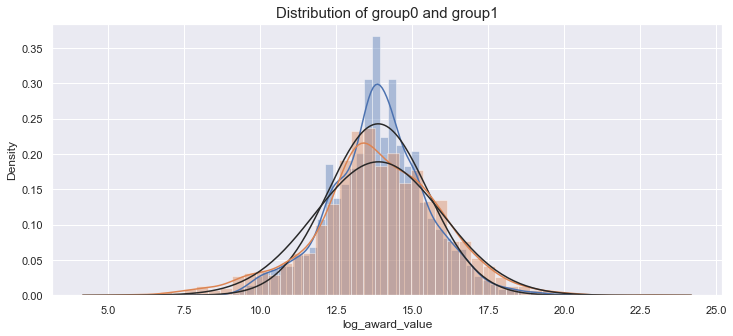

KstestResult(statistic=0.9999999999997308, pvalue=0.0)

In [102]:
# 3. Plot distribution of group0 and group1
sns.set_theme()
np.random.seed(0) 
sns.distplot(group1, fit=norm)
sns.distplot(group0, fit=norm)
plt.title('Distribution of group0 and group1', fontsize=15)
plt.show()

# Kolmogorov-Smirnov test to test grouped data for normality
stats.kstest(group0, 'norm')
stats.kstest(group1, 'norm')

In [103]:
# 4. Perform an independed two sample t-test.

stats.ttest_ind(group0, group1, alternative='less')

# if p-value < 0.05: reject H0 
# if p-value > 0.05: fail to reject H0

# p-value 0.593 > 0.05 --> fail to reject that group0 > group1

Ttest_indResult(statistic=0.236345430368595, pvalue=0.59341457461433)

In [104]:
# test on non-transformed, non-normal data using Wilcoxon signed-rank test

# group data by company's DUNS number (using mean statistics)
# (DUNS number is a unique company identifier)
awards2021_test1=awards2021.groupby(["recipient_duns"]).mean()

#split grouped data into two groups by the set aside requirement
group0_nn=awards2021_test1.loc[(awards2021_test1['setaside_requirement']==0)]['award_value']
group1_nn=awards2021_test1.loc[(awards2021_test1['setaside_requirement']==1)]['award_value']

In [105]:
# perform Wilcoxon signed-rank test for non-normalized data

stats.ranksums(group0_nn, group1_nn, alternative='less')

# p-value < 0.05: reject H0 
# p-value > 0.05 : fail to reject H0

# p-value 0.488 > 0.05 --> fail to reject that group0 > group1

RanksumsResult(statistic=-0.030048139138494658, pvalue=0.4880143305022562)